## Prediction using sklearn's SGDRegressor algorithm

In [1]:
# Importing required packages
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
# Loading data into matrix X and Y
X = load_boston().data
Y = load_boston().target

In [3]:
# Splitting of data  training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [4]:
# Preprocessing of data matrix X_train and X_test
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Training using standard sklearn SGDRegressor
clf = SGDRegressor()
clf.fit(X_train, y_train)
# calculating mse using trained model
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE using standard sklearn's implementation is", mse)

# Weight vector using standard implementation
w_std = clf.coef_

MSE using standard sklearn's implementation is 23.2395080399755


## Implementation of SGD for linear regression using numpy

In [6]:
def SGDRegressor_our(X, Y, k, n_iter, r = 1):
    """
    This function returns weight vector w and intercept bafter solving optimization problem by SGD on 
    X: Data matrix of size n*d
    y: given labels for each data point of size n*1
    w is vector of size d*1
    b is scalar which is intercept of hyperplane
    k: number of rows selected rondom from training dataset
    """
    from sklearn.utils import shuffle
    # getting shape of our data
    n, d = X.shape[0], X.shape[1]
    # Taking a random weight w and random intercept term b

    w = np.random.normal(size=d)           # Taking random weight vector w of size (13, )
    b = np.random.normal()
    
    for i in range(n_iter):
        # Selecting k random data points from X and their correcponding y's and store in X_new and y_new
        
        X_new, y_new = shuffle(X, Y)
        X_new = X_new[0:k]   # Selecting first k data points from X_new
        y_new = y_new[0:k]   # Selecting first k prices from y_new
        
        y_predicted = (X_new @ w) + b
        
        error = y_new - y_predicted
        sum_grad = np.zeros(13)
        
        for i in range(k):
            sum_grad = sum_grad + ((-2/k) * (X_new[i] * error[i]))
            
        # sum_grad = sum_grad / k
                                   
        w_new = w - (r * sum_grad)
        b_new = b - (r * ((-2) * (sum(error)/k)))
        
        r = r / 2
        w = w_new
        b = b_new
    # When loop ends we return vector w and intercept b
    return w, b

In [7]:
# Prediction function using weight w and intercept term b for data matrix X
def predict_our(X, w, b):
    y_pred_new = (X @ w) + b
    return y_pred_new              # This is of array of size len(X)

In [309]:
mse_train = []
mse_test = []
no_iter = []
for i in range(0, 20):
    no_iter.append(i)
    w_ans, b_ans = SGDRegressor_our(X_train, y_train, 250, i, 0.4)
    y_pred_our_train = predict_our(X_train, w_ans, b_ans)
    y_pred_our_test = predict_our(X_test, w_ans, b_ans)
    mse_train.append(mean_squared_error(y_train, y_pred_our_train))
    mse_test.append(mean_squared_error(y_test, y_pred_our_test))

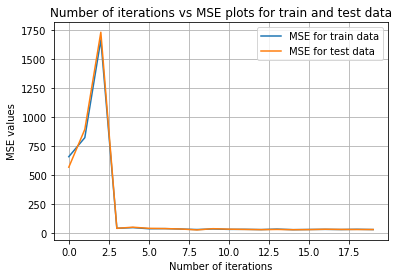

In [381]:
plt.plot(no_iter, mse_train, label = "MSE for train data")
plt.plot(no_iter, mse_test, label = "MSE for test data")
plt.title("Number of iterations vs MSE plots for train and test data")
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("MSE values")
plt.legend()
plt.show()

In [311]:
min(mse_test)

26.26823339878875

In [312]:
mse_test.index(min(mse_test))

8

In [376]:
# Training our for 8 iteration using batch size 250, We get it from above test
w_ans, b_ans = SGDRegressor_our(X_train, y_train, 250, 8, 0.4)
print(w_ans.shape)
print("*"*20)
print(b_ans)

(13,)
********************
21.559516124697506


In [377]:
# Making prediction using our w_ans and b_ans 
y_pred_our = predict_our(X_test, w_ans, b_ans)
print(y_pred_our.shape)

(167,)


#### Comparing MSE from our implementation to sklearn's implementation 

In [378]:
# calculating MSE for our y_pred
mse_our = mean_squared_error(y_test, y_pred_our)
print("MSE obtained from our implementaion is: ", mse_our)
print("MSE obtained from sklearn's implementaion is: ", mse)

MSE obtained from our implementaion is:  27.05517493518064
MSE obtained from sklearn's implementaion is:  23.2395080399755


#### Chart of predicted prices Vs actual prices of our SGD Implementation

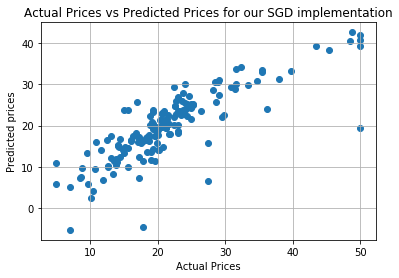

In [382]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_pred_our)
plt.grid()
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices for our SGD implementation")
plt.show()

#### Chart of predicted prices Vs actual prices of sklearn's SGD Implementation

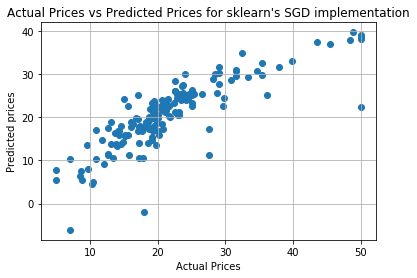

In [383]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_pred)
plt.grid()
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices for sklearn's SGD implementation")
plt.show()

#### Comparing the weights obtained from your our implementation with the weights obtained after applying sklearn's SGDRegresser

In [384]:
# importing PrettyTable class from prettytable module
from prettytable import PrettyTable
sr_n = [1,2,3,4,5,6,7,8,9,10,11,12,13]

# Initializing prettytable object
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",sr_n)
ptable.add_column("Weights of our Manual SGD", w_ans)
ptable.add_column("Weights of Sklearn's SGD", w_std)

# Printing the Table
print(ptable)

+-------+---------------------------+--------------------------+
| S.NO. | Weights of our Manual SGD | Weights of Sklearn's SGD |
+-------+---------------------------+--------------------------+
|   1   |    0.07510006269644429    |   -0.6354151259886601    |
|   2   |     0.5382012256928735    |   0.19160215339513478    |
|   3   |    -0.29901000762056684   |   -0.1331696023807379    |
|   4   |     0.9326356505893579    |    1.1200406925461959    |
|   5   |    0.41490937928455096    |   -0.8827199707659023    |
|   6   |     3.8223909322704914    |    3.1318643226726754    |
|   7   |    -0.38000230612117425   |   -0.17119099469745122   |
|   8   |    -0.4963496550859844    |   -1.4313343468054787    |
|   9   |     0.7735509483839189    |    0.518402871165879     |
|   10  |    -1.4079754441811076    |   -0.21557911694237195   |
|   11  |    -2.2107870262593496    |   -1.9022645587000067    |
|   12  |     0.9076097211206988    |    0.9780066031841307    |
|   13  |     -3.43941128

In [385]:
# Comparing intercept term for both
print("Intercept term for sklearn's implementation is: ",clf.intercept_[0])
print("Intercept term for our SGD implementation is: ",b_ans)

Intercept term for sklearn's implementation is:  22.316501367959823
Intercept term for our SGD implementation is:  21.559516124697506


#### Detailed procedure for predicting the house price

STEP 1 :- Load the boston data from sklearn.datasets.

STEP 2 :- Split data into X_train and X_test and Column standardized both differently.

STEP 3 :- Train the model using Sklearn implementation of SGD Regression and predict the house prices for X_test using trained model, Calculate Mean Squared Error (MSE) for actual prices and predicted prices.

STEP 4:- Implement Manual SGD Regression function and manual predict function.

STEP 5:- Train the model using manual implementation of SGD Regression and predict the house prices for X_test using trained model.

STEP 6:- Calculate Mean Squared Error (MSE) for Manual SGD implementation and Compare it to Sklearn's implementation of SGD regression.

STEP 7:- Draw Scatter Plot of the predictions of both manual SGD Regression and sklearn's SGD Regression.

STEP 8:- Compare the weights produced by both Manual SGD and Sklearn's SGD using prettytable.

STEP 9:- Compare the intercept term produced by both Manual SGD and Sklearn's SGD.